In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf 
import pandas as pd 
import numpy as np
import plotly.graph_objects as go

In [2]:
import yfinance as yf
import pandas as pd

# Download Daikin Industries (OTC: DKILY) data
daikin_data = yf.download(
    "DKILY", 
    start="2019-01-01", 
    end="2025-04-30",  # Adjust end date as needed
    progress=False,
    auto_adjust=True  # Use adjusted closing prices
)

# Check data
print(daikin_data.head())
print(f"\nData points: {len(daikin_data)}")

Price           Close       High        Low       Open  Volume
Ticker          DKILY      DKILY      DKILY      DKILY   DKILY
Date                                                          
2019-01-02  10.460088  10.479732  10.194903  10.224368  114400
2019-01-03  10.420802  10.499375  10.322586  10.499375  103300
2019-01-04  10.519019  10.548484  10.253833  10.420802   77600
2019-01-07  10.843134  11.000281  10.627057  10.705630   98900
2019-01-08  10.754739  10.833312  10.666344  10.823491  141000

Data points: 1590


In [14]:
# Save to CSV for analysis  (Optional)
daikin_data.to_csv("daikin_stock_prices_2019_2025.csv")

In [3]:
daikin_data.head()

Price,Close,High,Low,Open,Volume
Ticker,DKILY,DKILY,DKILY,DKILY,DKILY
Date,,,,,
2019-01-02,10.460088,10.479732,10.194903,10.224368,114400
2019-01-03,10.420802,10.499375,10.322586,10.499375,103300
2019-01-04,10.519019,10.548484,10.253833,10.420802,77600
2019-01-07,10.843134,11.000281,10.627057,10.705630,98900
2019-01-08,10.754739,10.833312,10.666344,10.823491,141000


In [4]:
# Filter out 'DKILY' last one year data as df
df = daikin_data[daikin_data.index >= '2023-01-01']
df.shape

(582, 5)

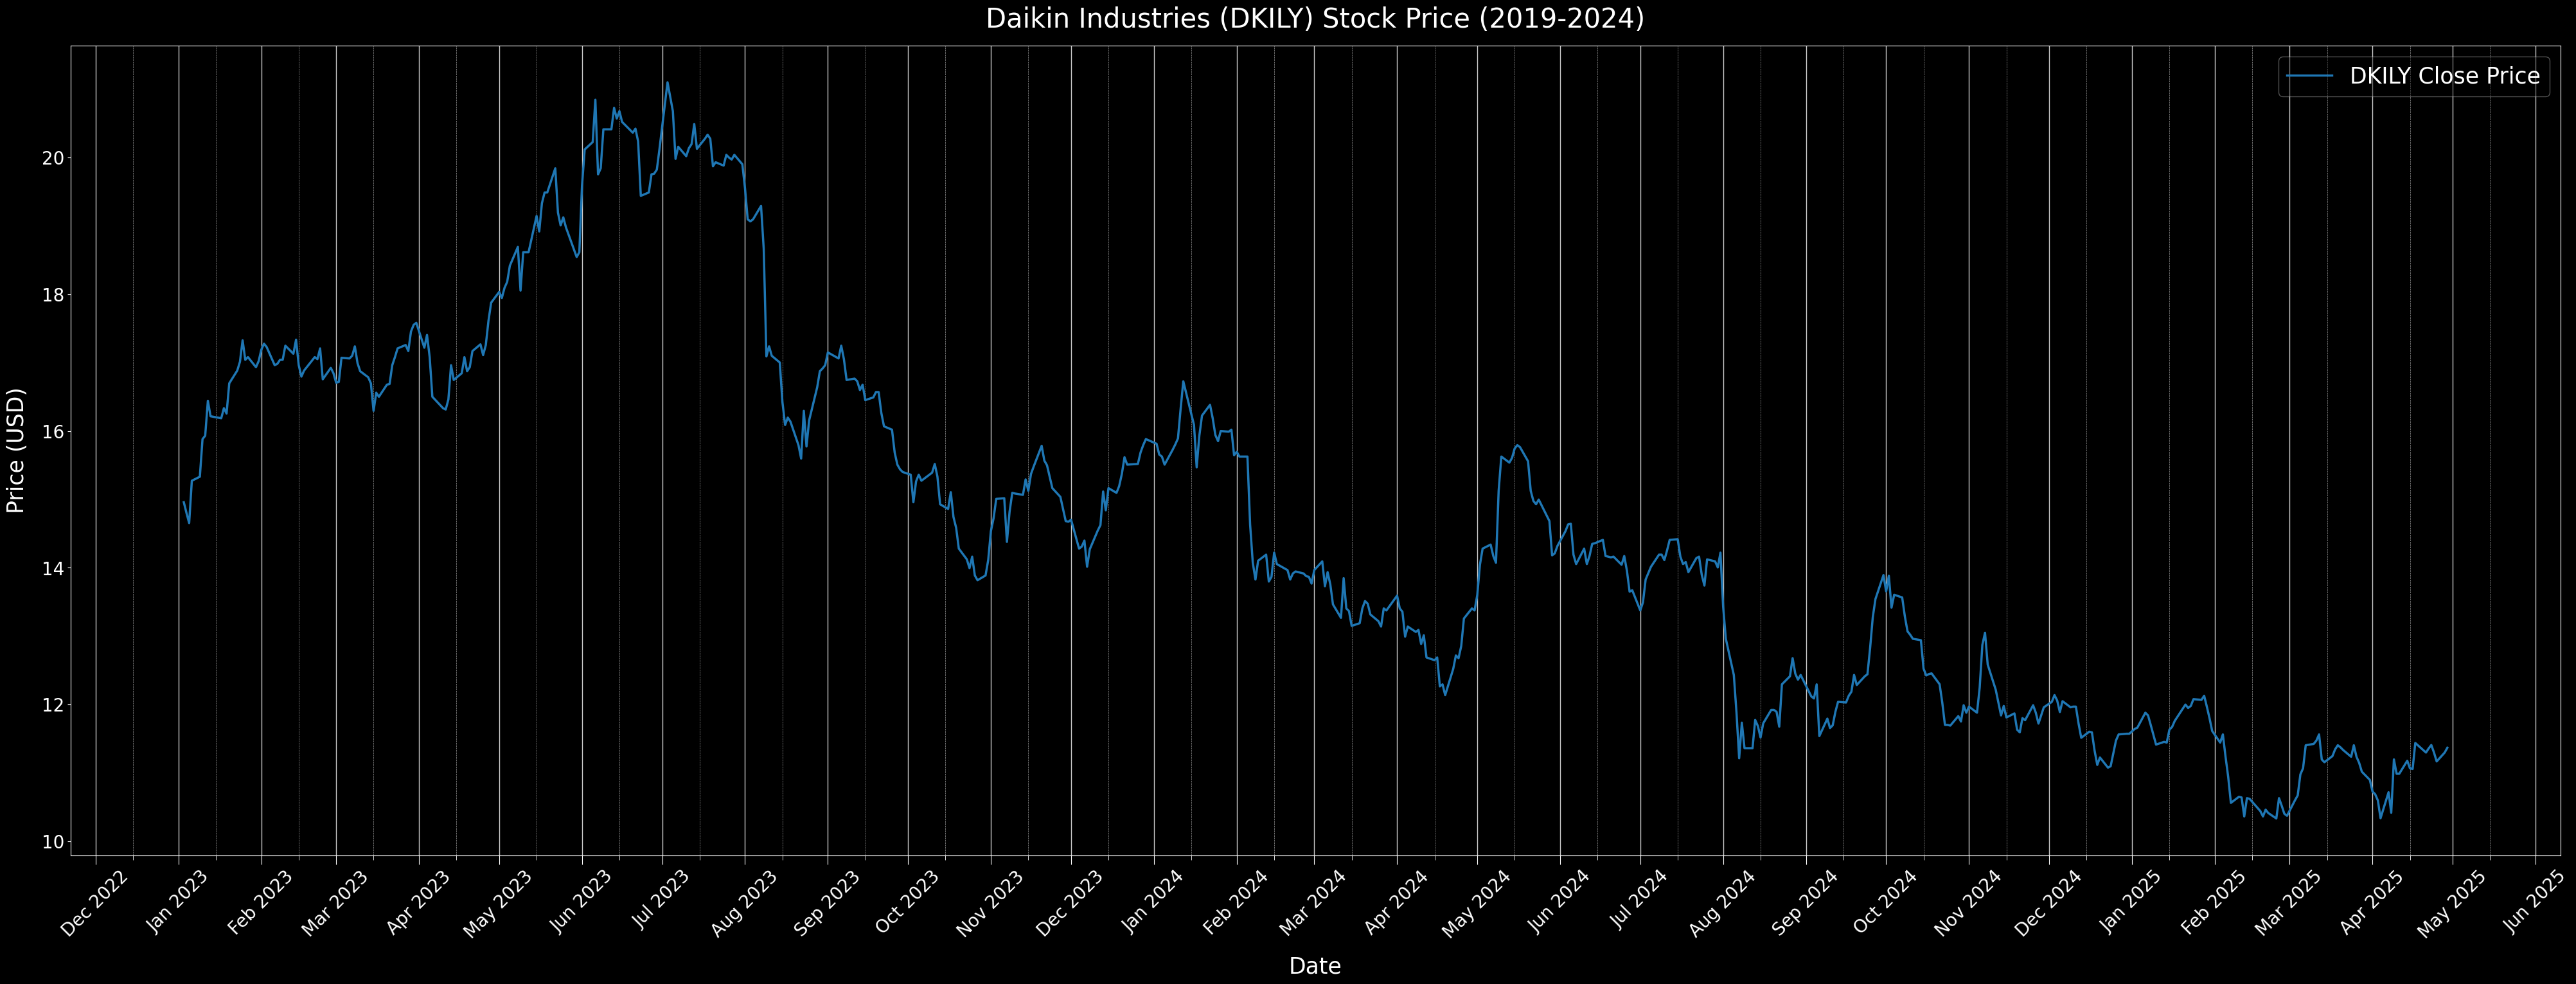

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

# Configure dark theme
plt.style.use('dark_background')
plt.figure(figsize=(50, 20))
ax = plt.gca()

# Plot with improved styling
ax.plot(df.index, df['Close'], 
        color='#1f77b4', 
        linewidth=2.5,
        label='DKILY Close Price')

# Formatting
ax.set_title("Daikin Industries (DKILY) Stock Price (2019-2024)", 
             pad=20, fontsize=30)
ax.set_xlabel("Date", labelpad=15, fontsize=25)
ax.set_ylabel("Price (USD)", labelpad=15, fontsize=25)

# Grid configuration - VERTICAL ONLY (horizontal turned off)
ax.grid(True, axis='x', linestyle='-', alpha=0.8, linewidth=1)  # Major vertical grid
ax.grid(which='minor', axis='x', linestyle='--', alpha=0.6, linewidth=0.5)  # Minor vertical grid

# Date formatting - ALL MONTHS
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Every month as major tick
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # "Jan 2020" format
ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday=15))  # Mid-month minor tick

# Customize ticks
ax.tick_params(axis='x', which='major', labelsize=20, length=10, rotation=45)
ax.tick_params(axis='x', which='minor', length=5)
ax.tick_params(axis='y', which='both', labelsize=20)

# Remove horizontal grid completely
ax.yaxis.grid(False)

# Legend
ax.legend(fontsize=25, framealpha=0.4)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.25)  # Extra space for rotated labels

plt.show()

In [ ]:




# Ensure 'Close' is a Series, not a single-column DataFrame
close_series = stock_data['Close'].squeeze()  # .squeeze() converts (N,1) -> (N,)

# Decompose the series
decomposition_additive = seasonal_decompose(close_series, model='additive', period=30)

# Get components
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

# Combine and drop NaNs
df_decomposed = pd.DataFrame({
    'Close': close_series,
    'Trend': trend_additive,
    'Seasonal': seasonal_additive,
    'Residual': residual_additive
}).dropna()

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Close'],
    name='Close Price',
    mode='lines',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Trend'],
    name='Trend',
    mode='lines',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Seasonal'],
    name='Seasonality',
    mode='lines',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=df_decomposed.index,
    y=df_decomposed['Residual'],
    name='Residual',
    mode='lines',
    line=dict(color='blue')
))

fig.update_layout(
    title='AAPL Stock Price Over Time',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_dark',
    width=1500,
    height=700,
    legend=dict(orientation='h')
)

fig.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18972\845024069.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("LGEIY", start="2022-01-01", end="2022-12-31")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LGEIY']: YFTzMissingError('possibly delisted; no timezone found')


ValueError: x must have 2 complete cycles requires 60 observations. x only has 0 observation(s)